In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy.integrate import solve_ivp
from scipy.spatial.distance import euclidean

from sklearn.metrics import mean_squared_error

In [2]:
def SIR(t, Z, beta, gamma):
    S, I, R = Z
    fraction_of_suseptible = -beta * S * I
    fraction_of_infected = beta * S * I - gamma * I
    fraction_of_recovering = gamma * I
    return [fraction_of_suseptible, fraction_of_infected, fraction_of_recovering]

\begin{aligned}
\frac{dS}{dt} &= -\beta S I, \\
\frac{dI}{dt} &= \beta S I - \gamma I, \\
\frac{dR}{dt} &= \gamma I,
\end{aligned}

In [3]:
S0 = 0.99
I0 = 0.01
R0 = 0.0
y0 = [S0, I0, R0]

beta_values = [0.8, 0.3, 0.03]
gamma_values = [0.6, 0.1, 0.001]

max_time = 356 # in days
STEPS = 1000
t_span = np.linspace(0, max_time, STEPS)


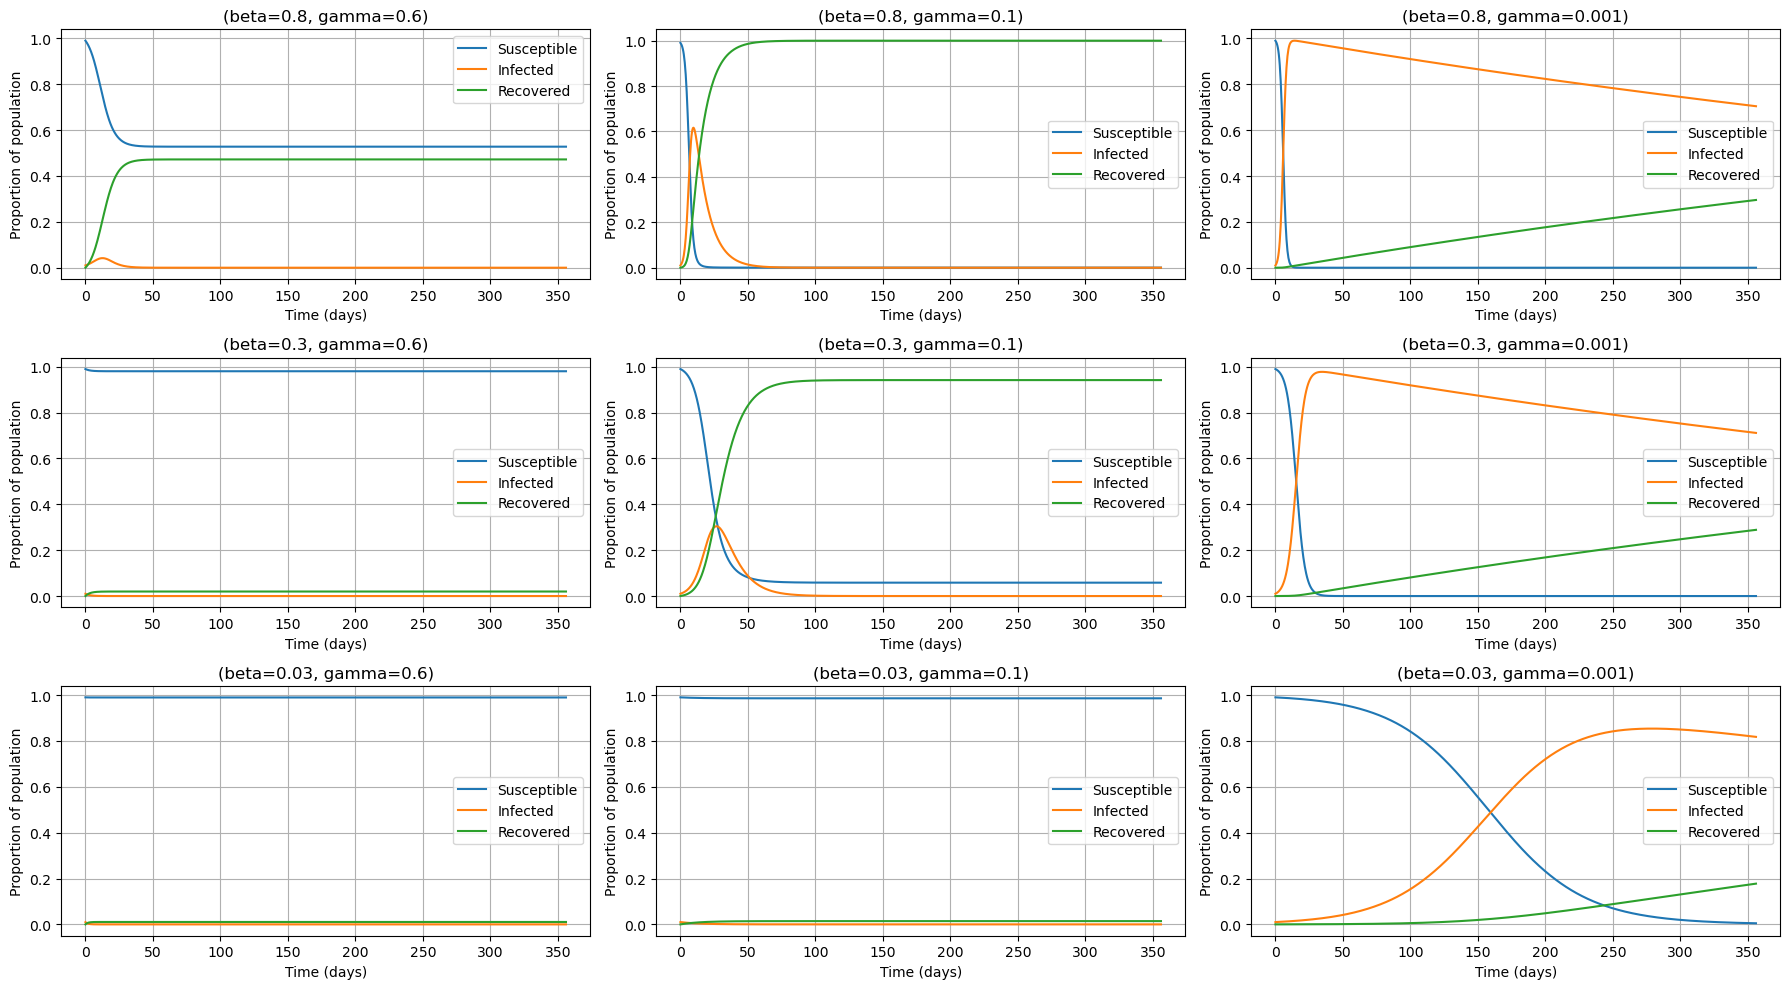

In [4]:
fig, axs = plt.subplots(len(beta_values), len(gamma_values), figsize=(18, 10))
axs = axs.ravel()
i = 0
for beta in beta_values:
    for gamma in gamma_values:
        sol = solve_ivp(SIR, [0, max_time], y0, args=(beta, gamma), t_eval=t_span, dense_output=True)
        S, I, R = sol.sol(t_span)

        axs[i].plot(t_span, S, label="Susceptible")
        axs[i].plot(t_span, I, label="Infected")
        axs[i].plot(t_span, R, label="Recovered")
        axs[i].set_xlabel("Time (days)")
        axs[i].set_ylabel("Proportion of population")
        axs[i].set_title(f"(beta={beta}, gamma={gamma})")
        axs[i].legend()
        axs[i].grid(True)

        i+=1

plt.tight_layout()
plt.show()

-------------------------

In [5]:
N = 763
init_infected = 1
I0 = init_infected / N
S0 = (N - init_infected) / N
R0 = 0.0
y0 = [S0, I0, R0]

days = 14
t_span = np.arange(0, days + 1)

target = np.array([1, 3, 8, 28, 75, 221, 291, 255, 235, 190, 125, 70, 28, 12, 5])

INFECTED = 1

In [15]:
beta_range = np.arange(0, 2.01, 0.01)
gamma_range = np.arange(0, 2.01, 0.01)

best_beta, best_gamma = 0.0, 0.0
lowest_loss = float('inf')

for beta in beta_range:
    for gamma in gamma_range:
        sol = solve_ivp(SIR, (0, days), y0, args=(beta, gamma), dense_output=True)
        output = sol.sol(t_span)[INFECTED]
        
        loss = mean_squared_error(output * N, target)
        if loss < lowest_loss:
            lowest_loss = loss
            best_beta, best_gamma = beta, gamma

print(f"Best parameters: x = {best_beta:.2f}, y = {best_gamma:.2f}")
print(f"Lowest loss: {lowest_loss:.2f}")

Best parameters: x = 1.67, y = 0.45
Lowest loss: 270.06


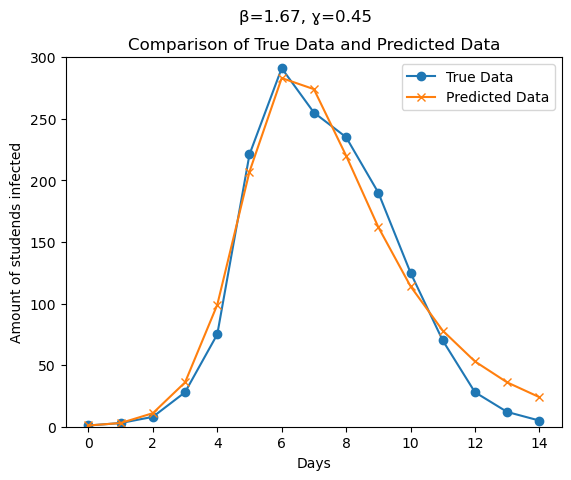

In [18]:
sol = solve_ivp(SIR, (0, 14), y0, args=(best_beta, best_gamma), dense_output=True)
I = sol.sol(t_span)[INFECTED]
I = I * N
I = np.round(I)

y_min = 0
y_max = 300

x = columns=np.arange(0, max_time + 1)
plt.plot(t_span, target, marker='o', label='True Data')
plt.plot(t_span, I, marker='x', label='Predicted Data')
plt.xlabel('Days')
plt.ylabel('Amount of studends infected')
plt.title('Comparison of True Data and Predicted Data')
plt.suptitle(f'β={best_beta}, γ={best_gamma}')
plt.ylim(y_min, y_max)
plt.legend()

-------------------------------